<a href="https://colab.research.google.com/github/Bisolacodesalways/Development-of-a-Predictive-maintenance-system-through-Machine-and-Deep-Learning-Models/blob/main/Copy_of_Copy_of_Crack_Detection_with_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


DEFLECTION PREDICTION: RANDOM FOREST REGRESSOR & HYPERPARAMETER TUNING

In [ ]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Read data into dataframe
data = pd.read_csv(r"/content/gdrive/MyDrive/Colab Notebooks/DATASET__DEFLECTION.csv")
data.head()

,Moment of inertia(cm^4),Span Length (m),Modulus of Elasticity(Gpa),Point Load(KN),Stiffness(KNm^2),δ = Deflection(m)
0,120,6.1,200,18.44,100,0.01
1,125,6.1,210,18.44,90,0.02
2,130,6.1,200,18.44,110,0.02
3,140,6.1,190,18.44,105,0.03
4,145,6.1,195,18.44,70,0.02


In [ ]:
# Extract the input features and target variable
X = data[['Span Length (m)', 'Point Load(KN)', 'Modulus of Elasticity(Gpa)', 'Moment of inertia(cm^4)', 'Stiffness(KNm^2)']]
y = data['δ = Deflection(m)']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# Create and fit the Random Forest Regression model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Predict deflection for the test data
y_pred = rf_model.predict(X_test)

In [ ]:
rf_model.score(X_train,y_train)

0.9164019618186241

In [ ]:
rf_model.score(X_test,y_test)

0.522052031025577

In [ ]:
# Evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
# Print the evaluation metrics
print("Random Forest Regression Evaluation Metrics:")
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R^2 Score (Coefficient of Determination):", r2)

Random Forest Regression Evaluation Metrics:
Root Mean Squared Error (RMSE): 0.011913378958965938
Mean Absolute Error (MAE): 0.008239123376623378
R^2 Score (Coefficient of Determination): 0.522052031025577


In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [ ]:
# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [ ]:
# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(rf_model, param_distributions=param_grid, n_iter=50,
                                   scoring='r2', cv=5, random_state=42)

In [ ]:
# Fit the randomized search to the training data
random_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=50,
                   param_distributions={'max_depth': [None, 10, 20],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='r2')

In [ ]:
# Get the best model and its hyperparameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

In [ ]:
# Predict deflection for the test data using the best model
y_pred = best_model.predict(X_test)

In [ ]:
best_model.score(X_train,y_train)

0.6661238633276175

In [ ]:
best_model.score(X_test,y_test)

0.5753615548465354

In [ ]:
# Evaluate the model's performance using R2 score
r2 = r2_score(y_test, y_pred)

In [ ]:
# Print the best hyperparameters and the R2 score
print("Best Hyperparameters:", best_params)
print("R^2 Score (Coefficient of Determination):", r2)

Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10}
R^2 Score (Coefficient of Determination): 0.5753615548465354


In [ ]:
deflection_threshold = 0.05
samples_needing_maintenance = []

for i in range(len(y_test)):
    if y_pred[i] > deflection_threshold:
        samples_needing_maintenance.append({
            "sample_index": i + 1,
            "deflection_value": y_pred[i],
            "maintenance_required": True,
            "maintenance_details": "Inspect and address deflection issue."
        })

# Print or process the list of samples needing maintenance
for sample in samples_needing_maintenance:
    print(f"Sample {sample['sample_index']}: Deflection = {sample['deflection_value']}")
    if sample['maintenance_required']:
        print("Maintenance is required. Details:", sample['maintenance_details'])

Sample 283: Deflection = 0.053851299734407304
Maintenance is required. Details: Inspect and address deflection issue.
Sample 307: Deflection = 0.05032705085811831
Maintenance is required. Details: Inspect and address deflection issue.
Sample 339: Deflection = 0.055424958685986604
Maintenance is required. Details: Inspect and address deflection issue.
Sample 359: Deflection = 0.05696005665586313
Maintenance is required. Details: Inspect and address deflection issue.
Sample 404: Deflection = 0.05051929249329648
Maintenance is required. Details: Inspect and address deflection issue.
Sample 440: Deflection = 0.050723264192278836
Maintenance is required. Details: Inspect and address deflection issue.
Sample 499: Deflection = 0.052898210794557345
Maintenance is required. Details: Inspect and address deflection issue.
Sample 505: Deflection = 0.054413128554902865
Maintenance is required. Details: Inspect and address deflection issue.
Sample 535: Deflection = 0.05589012696054554
Maintenance is

In [ ]:
import joblib
model_filename = 'Random_forest_Deflection_model.pkl'
joblib.dump(best_model, model_filename)
print(f"Model saved as {model_filename}")

Model saved as Random_forest_Deflection_model.pkl


CRACK DETECTION VIA CNN (VGG16,VGG19 & RESNET50)


In [ ]:
import itertools
import os


import tensorflow as tf
import tensorflow_hub as hub

print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

TF version: 2.12.0
Hub version: 0.14.0
GPU is available


Importing Necessary Libraries


In [ ]:
import os
import glob
import PIL
import PIL.Image
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import VGG16
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.callbacks import Callback,EarlyStopping, ModelCheckpoint

In [ ]:
# Colab setup ------------------
import os, sys, subprocess
if "google.colab" in sys.modules:
    cmd = "pip install --upgrade watermark"
    process = subprocess.Popen(cmd.split(), stdout=subprocess.PIPE)

Load and Visualize Dataset


In [ ]:
import glob

data_path = '/content/drive/MyDrive/Cracks/'

In [ ]:
path = '/content/drive/MyDrive/Cracks/'
path_all = list(glob.glob(path+'**/*jpg'))
path_Negative = path + '/content/drive/MyDrive/Cracks/Negative/*.jpg'
path_Positive = path + '/content/drive/MyDrive/Cracks/Positive/*.jpg'

Text(0.5, 1.0, 'Negative and Positive')

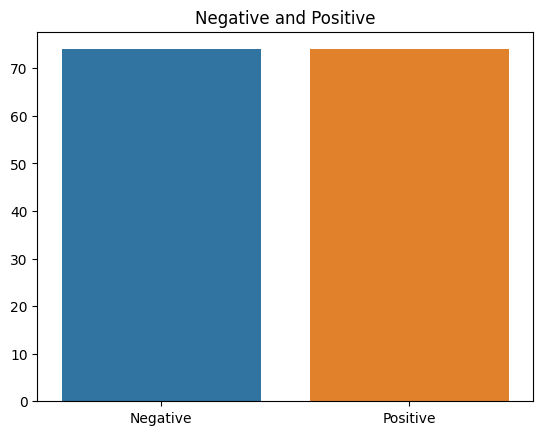

In [ ]:
sns.barplot(x=['Negative','Positive'], y=[len(path_Negative), len(path_Positive)])
plt.title('Negative and Positive')

In [ ]:
labels = list(map(lambda x:os.path.split(os.path.split(x)[0])[1], path_all))
file_Path = pd.Series(path_all, name='File_Path',dtype=object)
labels = pd.Series(labels, name='Label', dtype=object)
data = pd.concat([file_Path, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
(data.head())



,File_Path,Label
0,/content/drive/MyDrive/Cracks/Positive/08144.jpg,Positive
1,/content/drive/MyDrive/Cracks/Positive/13084_1...,Positive
2,/content/drive/MyDrive/Cracks/Positive/11041_1...,Positive
3,/content/drive/MyDrive/Cracks/Negative/16075.jpg,Negative
4,/content/drive/MyDrive/Cracks/Negative/06141.jpg,Negative


In [ ]:
import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_1, *['Label'], **{})
chart

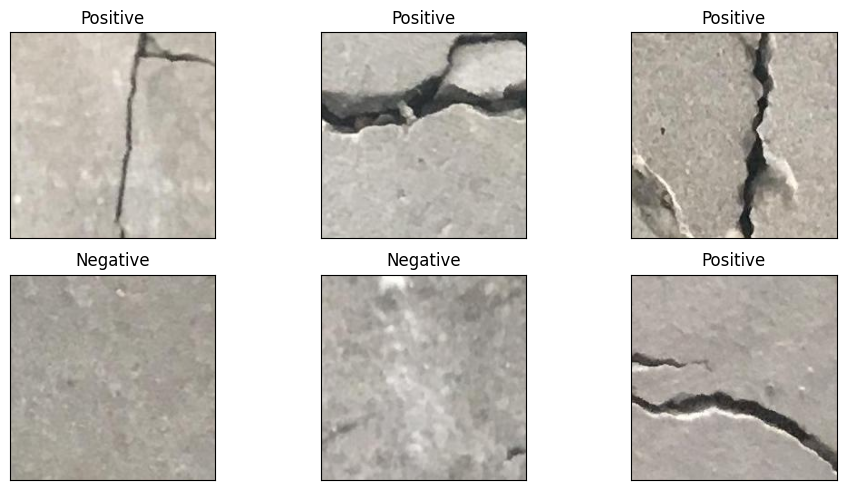

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(10,5), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.File_Path[i]))
    ax.set_title(data.Label[i])
plt.tight_layout()
plt.show()

In [ ]:
#initializing random seeds so results are repeatable
import random
random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

In [ ]:
train_df, test_df = train_test_split(data, test_size=0.3, random_state=42)

Creating Functions for Train and Test data using image data generator



In [ ]:
# define functions for train and test data for preprocessing
def gen(pre,train,test):
    train_datagen = ImageDataGenerator(
                        preprocessing_function=pre,
                        validation_split=0.3)
    test_datagen = ImageDataGenerator(
                        preprocessing_function=pre)

    train_gen = train_datagen.flow_from_dataframe(
        dataframe=train,
        x_col='File_Path',
        y_col='Label',
        target_size=(100,100),
        class_mode='categorical',
        batch_size=64,
        shuffle=True,
        seed=42
        )

    test_gen = test_datagen.flow_from_dataframe(
        dataframe=test,
        x_col='File_Path',
        y_col='Label',
        target_size=(100,100),
        color_mode='rgb',
        class_mode='categorical',
        batch_size=64,
        shuffle=False
    )
    return train_gen, test_gen

In [ ]:
def func(name_model):
    pre_model = name_model(input_shape=(100,100, 3),alpha=1.0,
                   include_top=False,
                   weights='imagenet',
                   pooling='avg')
    pre_model.trainable = True
    inputs = pre_model.input

    x = Dense(64, activation='relu')(pre_model.output)
    x = Dense(64, activation='relu')(x)
    outputs = Dense(2, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(loss = 'categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
    my_callbacks  = [ModelCheckpoint('model1-{epoch:03d}.h5',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')]
    return model, my_callbacks

In [ ]:
def plot(history,df_test,test_gen,train_gen):
    # Plotting Accuracy, val_accuracy, loss, val_loss
    fig, ax = plt.subplots(1, 2, figsize=(10, 3))
    ax = ax.ravel()

    for i, met in enumerate(['accuracy', 'loss']):
        ax[i].plot(history.history[met])
        ax[i].plot(history.history['val_' + met])
        ax[i].set_title('Model {}'.format(met))
        ax[i].set_xlabel('epochs')
        ax[i].set_ylabel(met)
        ax[i].legend(['train', 'val'])

    # Predict Data Test

    #load best model (after training) to see confusion matrix

    #model=load_model(r"/content/gdrive/MyDrive/surfacedata/model1-008.h5")

    ##

    pred = model.predict(test_gen )
    pred = np.argmax(pred,axis=1)
    labels = (train_gen.class_indices)
    labels = dict((v,k) for k,v in labels.items())
    pred = [labels[k] for k in pred]

    # Classification report
    cm=confusion_matrix(df_test.Label,pred)
    clr = classification_report(df_test.Label, pred, target_names=["NEGATIVE", "POSITIVE"])
    print(clr)
    print(cm)
    # Display 6 picture of the dataset with their labels
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(plt.imread(df_test.File_Path.iloc[i+1]))
        ax.set_title(f"True: {df_test.Label.iloc[i+1]}\nPredicted: {pred[i+1]}")
    plt.tight_layout()
    plt.show()

    return history,cm

In [ ]:
def result_test(test,model_use):
    results = model_use.evaluate(test, verbose=0)

    print("    Test Loss: {:.5f}".format(results[0]))
    print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    return results

In [ ]:
from tensorflow.keras.applications import VGG16,VGG19,ResNet50,MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

net_pre= preprocess_input
train_gen_net ,test_gen_net = gen(net_pre,train_df,test_df)

Found 28000 validated image filenames belonging to 2 classes.
Found 12000 validated image filenames belonging to 2 classes.


In [ ]:
def func(name_model):
    pre_model = name_model(input_shape=(100,100, 3),alpha=1.0,
                   include_top=False,
                   weights='imagenet',
                   pooling='avg')
    pre_model.trainable = True
    inputs = pre_model.input

    x = Dense(64, activation='relu')(pre_model.output)
    x = Dense(64, activation='relu')(x)
    outputs = Dense(2, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(loss = 'categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
    my_callbacks  = [ModelCheckpoint('model1-{epoch:03d}.h5',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')]
    return model, my_callbacks

In [ ]:
model, callback=func(MobileNetV2)

Train the pre-processed dataset

In [ ]:
history = model.fit(
    train_gen_net,
    validation_data=test_gen_net ,
    epochs=10,
    callbacks=callback
)

Epoch 1/10
438/438 [==============================] - 5685s 13s/step - loss: 0.0068 - accuracy: 0.9978 - val_loss: 0.0951 - val_accuracy: 0.9902
Epoch 2/10
438/438 [==============================] - 59s 135ms/step - loss: 0.0078 - accuracy: 0.9981 - val_loss: 0.0494 - val_accuracy: 0.9955
Epoch 3/10
438/438 [==============================] - 59s 135ms/step - loss: 0.0075 - accuracy: 0.9980 - val_loss: 0.0327 - val_accuracy: 0.9976
Epoch 4/10
438/438 [==============================] - 59s 134ms/step - loss: 0.0052 - accuracy: 0.9984 - val_loss: 0.4575 - val_accuracy: 0.9622
Epoch 5/10
438/438 [==============================] - 58s 133ms/step - loss: 0.0054 - accuracy: 0.9986 - val_loss: 0.0455 - val_accuracy: 0.9963
Epoch 6/10
438/438 [==============================] - 59s 135ms/step - loss: 0.0032 - accuracy: 0.9990 - val_loss: 0.0541 - val_accuracy: 0.9973
Epoch 7/10
438/438 [==============================] - 59s 134ms/step - loss: 0.0106 - accuracy: 0.9969 - val_loss: 15.4147 - val_a

Plot Results

In [ ]:
#load the best model to see results
from keras.models import load_model
model=load_model(r"/content/model1-001.h5")

In [ ]:
def plot(history,df_test,test_gen,train_gen):
    # Plotting Accuracy, val_accuracy, loss, val_loss
    fig, ax = plt.subplots(1, 2, figsize=(10, 3))
    ax = ax.ravel()

    for i, met in enumerate(['accuracy', 'loss']):
        ax[i].plot(history.history[met])
        ax[i].plot(history.history['val_' + met])
        ax[i].set_title('Model {}'.format(met))
        ax[i].set_xlabel('epochs')
        ax[i].set_ylabel(met)
        ax[i].legend(['train', 'val'])

    # Predict Data Test

    ## load best model (after training) to see confusion matrix

    model=load_model(r"/content/model1-001.h5")

    ##

    pred = model.predict(test_gen )
    pred = np.argmax(pred,axis=1)
    labels = (train_gen.class_indices)
    labels = dict((v,k) for k,v in labels.items())
    pred = [labels[k] for k in pred]

    # Classification report
    cm=confusion_matrix(df_test.Label,pred)
    clr = classification_report(df_test.Label, pred, target_names=["NEGATIVE", "POSITIVE"])
    print(clr)
    print(cm)
    # Display 6 picture of the dataset with their labels
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(plt.imread(df_test.File_Path.iloc[i+1]))
        ax.set_title(f"True: {df_test.Label.iloc[i+1]}\nPredicted: {pred[i+1]}")
    plt.tight_layout()
    plt.show()

    return history,cm

188/188 [==============================] - 28s 145ms/step
              precision    recall  f1-score   support

    NEGATIVE       0.98      1.00      0.99      5994
    POSITIVE       1.00      0.98      0.99      6006

    accuracy                           0.99     12000
   macro avg       0.99      0.99      0.99     12000
weighted avg       0.99      0.99      0.99     12000

[[5993    1]
 [ 101 5905]]


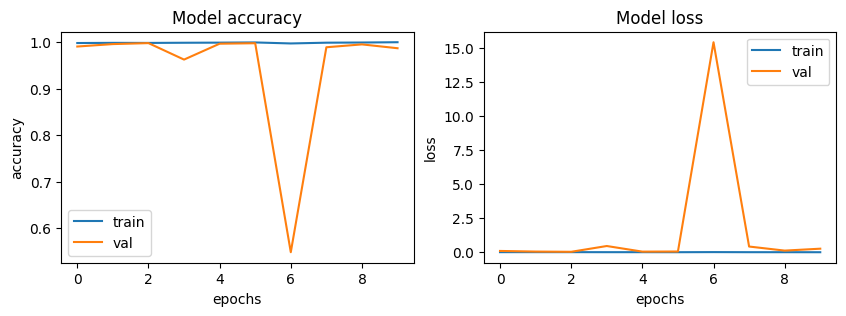

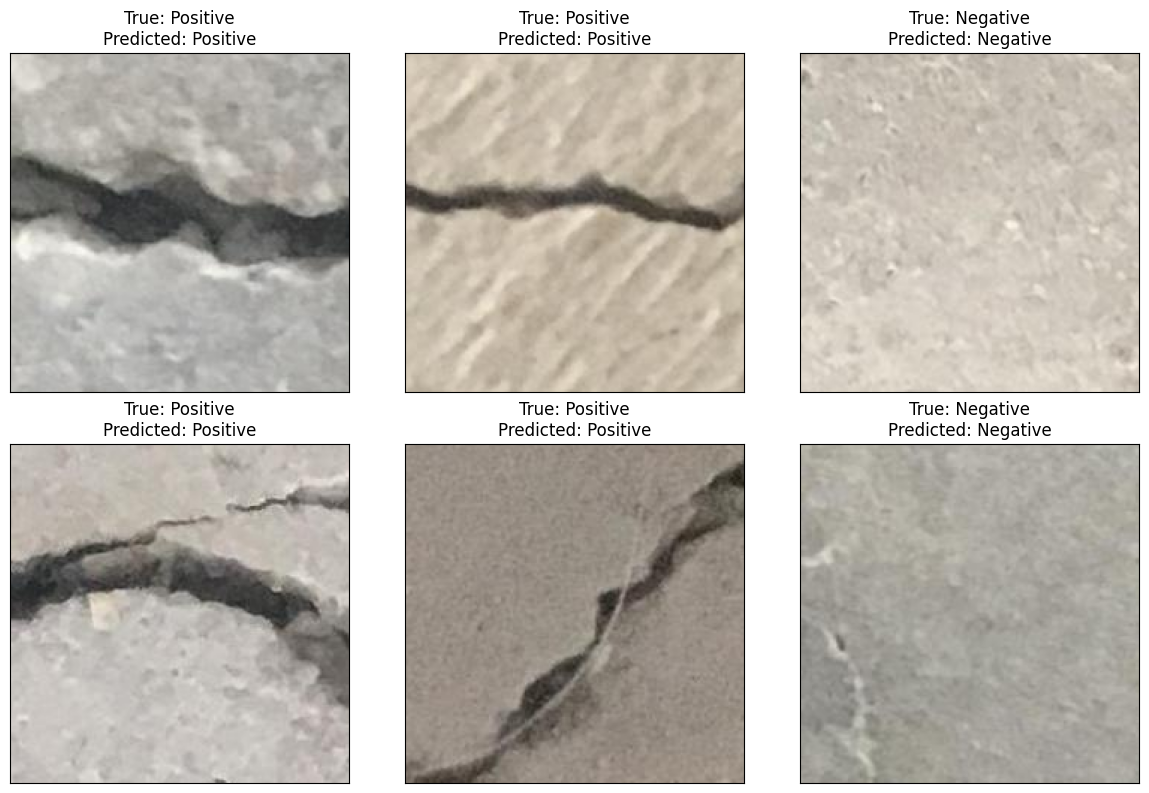

In [ ]:
#before run this cell, choose the best model in plot function that commented.
history,cm=plot(history,test_df,test_gen_net,train_gen_net)

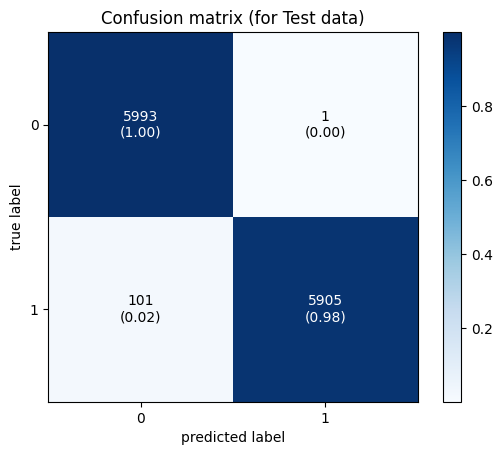

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

conf_matrix = cm
binary1 = conf_matrix

fig, ax = plot_confusion_matrix(conf_mat=binary1,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                )
plt.title('Confusion matrix (for Test data)')
plt.show()

In [ ]:
result_myNet = result_test(test_gen_net,model)

    Test Loss: 0.08022
Test Accuracy: 99.15%


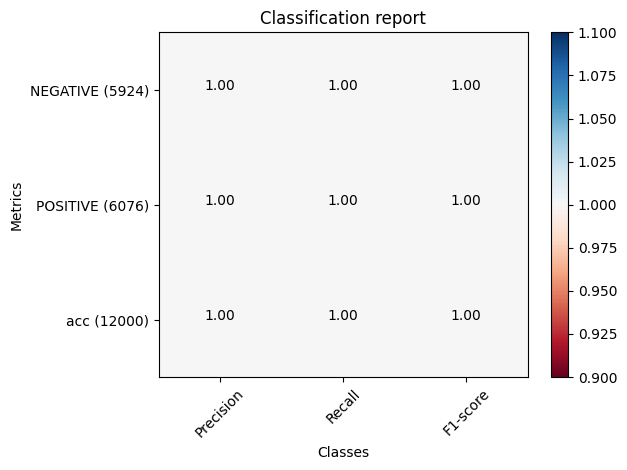

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import itertools


def plot_classification_report(classificationReport,
                               title='Classification report',
                               cmap='RdBu'):

    classificationReport = classificationReport.replace('\n\n', '\n')
    classificationReport = classificationReport.replace(' / ', '/')
    lines = classificationReport.split('\n')

    classes, plotMat, support, class_names = [], [], [], []
    for line in lines[1:]:  # if you don't want avg/total result, then change [1:] into [1:-1]
        t = line.strip().split()
        if len(t) < 2:
            continue
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(t[0])
        plotMat.append(v)

    plotMat = np.array(plotMat)
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup)
                   for idx, sup in enumerate(support)]

    plt.imshow(plotMat, interpolation='nearest', cmap=cmap, aspect='auto')
    plt.title(title)
    plt.colorbar()
    plt.xticks(np.arange(3), xticklabels, rotation=45)
    plt.yticks(np.arange(len(classes)), yticklabels)

    upper_thresh = plotMat.min() + (plotMat.max() - plotMat.min()) / 10 * 8
    lower_thresh = plotMat.min() + (plotMat.max() - plotMat.min()) / 10 * 2
    for i, j in itertools.product(range(plotMat.shape[0]), range(plotMat.shape[1])):
        plt.text(j, i, format(plotMat[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if (plotMat[i, j] > upper_thresh or plotMat[i, j] < lower_thresh) else "black")

    plt.ylabel('Metrics')
    plt.xlabel('Classes')
    plt.tight_layout()


def main():

    sampleClassificationReport = """             precision    recall  f1-score   support

          NEGATIVE       1.00      1.00      1.00       5924
          POSITIVE       1.00      1.00      1.00       6076

               acc       1.00      1.00      1.00       12000"""

    plot_classification_report(sampleClassificationReport)
    plt.show()
    plt.close()


if __name__ == '__main__':
    main()

In [ ]:
! pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.6/188.6 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 74.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 34.5 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st
import numpy as np
import os
import cv2  # For image processing
from PIL import Image, ImageOps
import cv2
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import streamlit as st
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2,preprocess_input as mobilenet_v2_preprocess_input


st.write("Predictive Maintenance system for Reinforced Concrete buildings")
st.markdown("This app helps to predict maintenance for wall surface buildings through crack and deflection detection")


# Load the trained Random Forest Regressor model
@st.cache_data
def loaded_model():
    deflection_model = joblib.load("/content/Random_forest_Deflection_model.pkl")
    return deflection_model

def predict_deflection(deflection_model, features):
    prediction = deflection_model.predict(features.reshape(1, -1))
    return prediction[0]


# Load the pre-trained model
@st.cache_data
def load_model():
    model = tf.keras.models.load_model("/content/model1-001.h5")
    return model

def predict_image(model, image_path):
    img = image.load_img(image_path, target_size=(100, 100))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the image
    # Make predictions
    predictions = model.predict(img_array)
    return predictions


def main():
    st.title("Crack and Deflection Detection")
    st.title("Deflection Prediction")
    st.sidebar.header("Input Features")

    # Create input fields for relevant features
    feature1 = st.sidebar.number_input("Moment of inertia(cm^4)")
    feature2 = st.sidebar.number_input("Span Length (m)")
    feature3 = st.sidebar.number_input("Modulus of Elasticity(Gpa)")
    feature4 = st.sidebar.number_input("Point Load(KN)")
    feature5 = st.sidebar.number_input("Stiffness(KNm^2)")


    input_features = np.array([feature1, feature2, feature3, feature4, feature5])  # Add more features to the array

    # Load the model
    deflection_model = loaded_model()

    # Make prediction
    deflection_prediction = predict_deflection(deflection_model, input_features)

    #st.subheader("Deflection Prediction:")
    st.write(f"Deflection_prediction: {deflection_prediction:.2f}")

    if st.sidebar.button("Predict"):
        deflection_prediction = predict_deflection(deflection_model, input_features)

    if deflection_prediction > 0.08:
        st.write(f"Maintenance is required. Details: Inspect and address deflection issue.")
    else:
        st.write(f"Deflection is okay, serviceability limit state reached")

    uploaded_image = st.file_uploader("Choose an image...", type=["jpg", "png", "jpeg"])
    if uploaded_image is not None:
        st.image(uploaded_image, caption="Uploaded Image", use_column_width=True)

        # Load the model
        model = load_model()

        # Make prediction
        predictions = predict_image(model, uploaded_image)

        # Interpret predictions
        class_names = ['Uncracked', 'Cracked']
        predicted_class = class_names[np.argmax(predictions)]
        confidence = predictions[0][np.argmax(predictions)]

        st.subheader("Prediction:")
        st.write(f"Class: {predicted_class}")
        st.write(f"Confidence: {confidence:.2f}")

        st.subheader("Crack Detection")
        st.write(f"The predicted class of the image is {predicted_class}")  # Display crack detection result

if __name__ == "__main__":
    main()



Overwriting app.py


In [ ]:
!curl ipv4.icanhazip.com

34.90.190.223


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501
!browser.gatherUsageStats

[..................] \ fetchMetadata: sill resolveWithNewModule yargs@17.1.1 ch

npx: installed 22 in 1.665s
your url is: https://ready-cows-battle.loca.lt

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.90.190.223:8501

2023-09-02 18:17:52.774792: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dis